<a href="https://colab.research.google.com/github/zeynep-tkn/PythonProjects/blob/main/DataFrameTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kayıp Verilerle Uğraşma

In [12]:
import numpy as np
import pandas as pd

In [3]:
arr=np.array([[10,20,np.nan],[5,np.nan,np.nan],[21,np.nan,10]])
arr.shape

(3, 3)

In [4]:
df=pd.DataFrame(arr,index=["Index1","Index2","Index3"],columns=["column1","column2","column3"])
df

,column1,column2,column3
Index1,10.0,20.0,NaN
Index2,5.0,NaN,NaN
Index3,21.0,NaN,10.0


In [5]:
df.dropna()

,column1,column2,column3


In [8]:
df.dropna(axis=1)

,column1
Index1,10.0
Index2,5.0
Index3,21.0


In [9]:
df

,column1,column2,column3
Index1,10.0,20.0,NaN
Index2,5.0,NaN,NaN
Index3,21.0,NaN,10.0


In [10]:
df.fillna(value=100)

,column1,column2,column3
Index1,10.0,20.0,100.0
Index2,5.0,100.0,100.0
Index3,21.0,100.0,10.0


In [11]:
deneme=df.sum

# GroupBy Sorguları


In [13]:
dataset={
    "Depertman":["Yazılım","Yazılım","Pazarlama","Pazarlama","Hukuk","Hukuk"],
    "Çalışanlar":["Ahmet","Mehmet","Atıl","Burak","Zeynep","Fatma"],
    "Maaş":[100,150,200,300,400,500]
}

In [14]:
dataset

{'Depertman': ['Yazılım',
  'Yazılım',
  'Pazarlama',
  'Pazarlama',
  'Hukuk',
  'Hukuk'],
 'Çalışanlar': ['Ahmet', 'Mehmet', 'Atıl', 'Burak', 'Zeynep', 'Fatma'],
 'Maaş': [100, 150, 200, 300, 400, 500]}

In [15]:
df=pd.DataFrame(dataset)

In [16]:
df

,Depertman,Çalışanlar,Maaş
0,Yazılım,Ahmet,100
1,Yazılım,Mehmet,150
2,Pazarlama,Atıl,200
3,Pazarlama,Burak,300
4,Hukuk,Zeynep,400
5,Hukuk,Fatma,500


In [17]:
DepGroup=df.groupby("Depertman")
DepGroup

In [18]:
DepGroup.sum()

,Çalışanlar,Maaş
Depertman,,
Hukuk,ZeynepFatma,900
Pazarlama,AtılBurak,500
Yazılım,AhmetMehmet,250


In [19]:
df.groupby("Depertman").max()

,Çalışanlar,Maaş
Depertman,,
Hukuk,Zeynep,500
Pazarlama,Burak,300
Yazılım,Mehmet,150


# Merge, Join ve Concatenate

##Concatenation

In [20]:
dataset1={
    "A":["A1","A2","A3","A4"],
    "B":["B1","B2","B3","B4"],
    "C":["C1","C2","C3","C4"],
}

In [21]:
dataset2={
    "A":["A5","A6","A7","A8"],
    "B":["B5","B6","B7","B8"],
    "C":["C5","C6","C7","C8"],
}

In [22]:
df1=pd.DataFrame(dataset1,index=[1,2,3,4])
df2=pd.DataFrame(dataset2,index=[5,6,7,8])

In [23]:
df1

,A,B,C
1,A1,B1,C1
2,A2,B2,C2
3,A3,B3,C3
4,A4,B4,C4


In [24]:
df2

,A,B,C
5,A5,B5,C5
6,A6,B6,C6
7,A7,B7,C7
8,A8,B8,C8


In [25]:
pd.concat([df1,df2])

,A,B,C
1,A1,B1,C1
2,A2,B2,C2
3,A3,B3,C3
4,A4,B4,C4
5,A5,B5,C5
6,A6,B6,C6
7,A7,B7,C7
8,A8,B8,C8


In [26]:
pd.concat([df1,df2],axis=1)

,A,B,C,A,B,C
1,A1,B1,C1,NaN,NaN,NaN
2,A2,B2,C2,NaN,NaN,NaN
3,A3,B3,C3,NaN,NaN,NaN
4,A4,B4,C4,NaN,NaN,NaN
5,NaN,NaN,NaN,A5,B5,C5
6,NaN,NaN,NaN,A6,B6,C6
7,NaN,NaN,NaN,A7,B7,C7
8,NaN,NaN,NaN,A8,B8,C8


##Merge

In [28]:
dataset1={
    "A":["A1","A2","A3"],
    "B":["B1","B2","B3"],
    "anahtar":["K0","K5","K3"]
}

In [29]:
df1=pd.DataFrame(dataset1,index=[1,2,3])

In [30]:
df1

,A,B,anahtar
1,A1,B1,K0
2,A2,B2,K5
3,A3,B3,K3


In [31]:
dataset2={
    "X":["X1","X2","X3","X4"],
    "Y":["Y1","Y2","Y3","Y4"],
    "anahtar":["K0","K1","K2","K3"]
}

In [32]:
df2=pd.DataFrame(dataset2,index=[1,2,3,4])

In [33]:
df2

,X,Y,anahtar
1,X1,Y1,K0
2,X2,Y2,K1
3,X3,Y3,K2
4,X4,Y4,K3


##Join

In [35]:
dataset1={
    "A":["A1","A2","A3","A4"],
    "B":["B1","B2","B3","B4"],
}
dataset2={
    "X":["X1","X2","X3"],
    "Y":["Y1","Y2","Y3"],
}

In [42]:
df1=pd.DataFrame(dataset1,index=[1,2,3,4])
df2=pd.DataFrame(dataset2,index=[1,2,3])


In [43]:
df1

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [44]:
df2

,X,Y
1,X1,Y1
2,X2,Y2
3,X3,Y3


In [46]:
df2.join(df1) #dataframe2'ye dataframe1 i ekle

,X,Y,A,B
1,X1,Y1,A1,B1
2,X2,Y2,A2,B2
3,X3,Y3,A3,B3


##3D Çizgi Grafiği

In [48]:
import matplotlib.pyplot as plt
import numpy as np

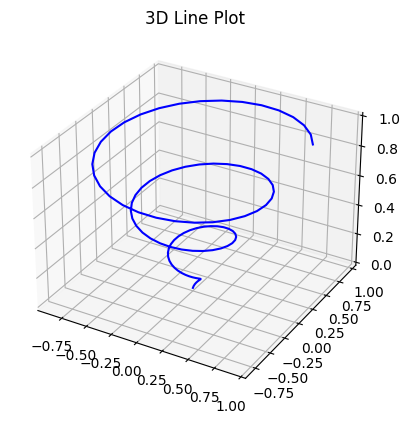

In [50]:
from mpl_toolkits import mplot3d
fig=plt.figure()
ax=plt.axes(projection="3d")

z=np.linspace(0,1,100)
x=z*np.sin(20*z)
y=z*np.cos(20*z)

ax.plot3D(x,y,z,"blue")
ax.set_title("3D Line Plot")
plt.show()